<a href="https://colab.research.google.com/github/AsmaaSobhyy/Book_Clustering/blob/main/Asmaa_Nlp_Book_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Preprocessing

In [1]:
import nltk
import requests 
from nltk.corpus import stopwords
import pandas as pd
import random
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt

import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score

In [2]:
import random
random.seed(0)

In [3]:
nltk.download('gutenberg')
nltk.download('stopwords')
nltk.download('wordnet')
!pip install --upgrade gensim

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
Requirement already up-to-date: gensim in /usr/local/lib/python3.7/dist-packages (4.0.1)


**a function that reads the book from gutenberg library and return it's text.**

In [4]:
def read_book(book_name):
    text = nltk.corpus.gutenberg.raw(book_name)
    return text

In [5]:
def read_from_url(url):
  response = requests.get(url)
  text=response.text.split('***')[2]
  return text

**tokinizing the text into a list of words, turning it to lower case and removing stop words.**<br>
*input : the text of the book<br>
output : a list of filtered words*

In [6]:
#tokinizing the words and removing all punctuation marks then changing it to lower case.
def filter_words(text):
    tokenizer = nltk.RegexpTokenizer(r"\w+")
    tokenized_words = tokenizer.tokenize(text)
    tokenized_words = [token.lower() for token in tokenized_words]
    stop_words=set(stopwords.words("english"))
    filtered_words=[]
    
    for w in tokenized_words:
        if w not in stop_words:
            filtered_words.append(w)
    return filtered_words

**Stemming and lemmatizing the text**<br>
*Stemming : coverting words like believing, believed, believes, and believe into believ*<br>
*Lemmatizing : coverting words into it's source, like better -> good*

In [7]:
def lem_words(filtered_words):
  wl=WordNetLemmatizer()
  lemmatized=[]
  for w in filtered_words:
    lm=wl.lemmatize(w)
    lemmatized.append(lm)
  return lemmatized

In [8]:
def stem_words(filtered_words):
  ps = PorterStemmer()
  wl=WordNetLemmatizer()
  stemmed=[]
  for w in filtered_words:
    st=ps.stem(w)
    stemmed.append(wl.lemmatize(st))
  return stemmed


**appending each N words into a partition and labeling them with the book name.**<br>
*input : filtered_words, book_name and number of words*<br>
*output : dataframe of the document as text, tokinized document and label.*

In [9]:
#append each 100 word to a document and label them with the book's name then returns a dataframe
#assumption: i removed the final document to maintain 100 word/document.
def create_docs(filtered_words,book_name,n_words=100):
    labeled_docs=[]
    tokinized_docs=[]
    for i in range(int(len(filtered_words)/n_words)):
        tokinized_docs.append(filtered_words[i*n_words:i*n_words+n_words])
        doc = ' '.join(filtered_words[i*n_words:i*n_words+n_words])
        labeled_docs.append(doc)
    labeled_docs= pd.DataFrame({'Document': labeled_docs,'tokinized_doc':tokinized_docs,'label':book_name})
    return labeled_docs


**taking random samples from the labeled documents.**

In [10]:
# take  a random variable
def take_sample(labeled_docs, sample_size):
    samples=labeled_docs.sample(sample_size,random_state=0)
    return samples

**collecting final steps to the function 'sample_book' that takes the book name and sample size and return the final sampled dataframe.**

In [11]:
def sample_book(book_name,sample_size,url='',word_per_doc=100):
    if url=='':
      path=book_name+'.txt'
      text=read_book(path)
    else:
      text=read_from_url(url)
    filtered_words=filter_words(text)
    stemmed_words=lem_words(filtered_words)
    labeled_docs=create_docs(stemmed_words,book_name,word_per_doc)
    samples=take_sample(labeled_docs,sample_size)
    print(book_name)
    return samples


## Preparing model input
taking 200 sample from 5 books and appending them into 'samples',<br>
splitiing the data into features and labels, then splitting them into training set and testing set.

In [12]:
books_url=[('nihilism_Beyond Good and Evil','https://www.gutenberg.org/cache/epub/4363/pg4363.txt'),
           ('nihilism_The Joyful Wisdom','https://www.gutenberg.org/files/52881/52881-0.txt'),
           ('adventure_Scaramouche','https://www.gutenberg.org/files/1947/1947-0.txt'),
           ('adventure_The Three Musketeers','https://www.gutenberg.org/files/1257/1257-0.txt'),
           ('Artistic Anatomy of Animals','https://www.gutenberg.org/cache/epub/38315/pg38315.txt'),
           ('Commentaries on the Surgery of the War','https://www.gutenberg.org/files/65622/65622-0.txt'),
           ]
books_count=len(books_url)
samples=pd.DataFrame()

for book in books_url:
  samples=samples.append(sample_book(book[0],200,book[1],150))

samples=samples.reset_index()
samples=samples.drop(columns=['index'])

nihilism_Beyond Good and Evil
nihilism_The Joyful Wisdom
adventure_Scaramouche
adventure_The Three Musketeers
Artistic Anatomy of Animals
Commentaries on the Surgery of the War


In [13]:
samples

,Document,tokinized_doc,label
0,deck something superior regular cult suffering...,"[deck, something, superior, regular, cult, suf...",nihilism_Beyond Good and Evil
1,disgrace child redounds parent retro operating...,"[disgrace, child, redounds, parent, retro, ope...",nihilism_Beyond Good and Evil
2,woman give everything perhaps phantom wish fir...,"[woman, give, everything, perhaps, phantom, wi...",nihilism_Beyond Good and Evil
3,may suggest contrary problem race granted one ...,"[may, suggest, contrary, problem, race, grante...",nihilism_Beyond Good and Evil
4,thee carry thee away god concealed beneath ide...,"[thee, carry, thee, away, god, concealed, bene...",nihilism_Beyond Good and Evil
...,...,...,...
1195,absolute rest ordinary attention comfort neces...,"[absolute, rest, ordinary, attention, comfort,...",Commentaries on the Surgery of the War
1196,pas across bone inch least trochanter major tu...,"[pas, across, bone, inch, least, trochanter, m...",Commentaries on the Surgery of the War
1197,excision injured portion bone upper third midd...,"[excision, injured, portion, bone, upper, thir...",Commentaries on the Surgery of the War
1198,muscle show long head triceps outer edge secon...,"[muscle, show, long, head, triceps, outer, edg...",Commentaries on the Surgery of the War


In [14]:
features= np.array(samples['Document'])
labels=np.array(samples['label'])
print(len(features))

1200


## Word-Embedding 

In [15]:
from gensim.test.utils import common_texts, get_tmpfile
from gensim.models import Word2Vec

#path = get_tmpfile("word2vec.model")
model = Word2Vec(samples['tokinized_doc'], vector_size=50, window=5, min_count=1, workers=4)
model.save("word2vec.model")

/usr/local/lib/python3.7/dist-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [16]:
vec_doc=[]
for doc in samples['tokinized_doc']:
  vec_doc.append([model.wv[x] for x in doc])

In [17]:
np.array(vec_doc[0]).shape
# vec_doc[0]

(150, 50)

In [18]:
samples['w2v_doc']=vec_doc
samples['flat_w2v']=[ np.hstack(x) for x in vec_doc ]
samples.head(1)

,Document,tokinized_doc,label,w2v_doc,flat_w2v
0,deck something superior regular cult suffering...,"[deck, something, superior, regular, cult, suf...",nihilism_Beyond Good and Evil,"[[0.09419143, -0.02897242, -0.024594389, 0.078...","[0.09419143, -0.02897242, -0.024594389, 0.0782..."


In [19]:
#shape of each w2v_doc record
print(np.array(samples['w2v_doc'][0]).shape)
np.array(samples['flat_w2v'][0]).shape

(150, 50)


(7500,)

In [20]:
#testing the model 
print(f"similarity between different books : {model.wv.n_similarity(samples['tokinized_doc'][0], samples['tokinized_doc'][1000])}")

similarity between different books : 0.9973491430282593


In [21]:
model.wv.most_similar('power', topn=10)

[('often', 0.9997900128364563),
 ('moral', 0.9997696280479431),
 ('instinct', 0.9997570514678955),
 ('new', 0.9997438192367554),
 ('soul', 0.9997349977493286),
 ('instance', 0.9997210502624512),
 ('therefore', 0.9997207522392273),
 ('belief', 0.9997121691703796),
 ('although', 0.9997060894966125),
 ('_â', 0.9996952414512634)]

In [22]:
#cosine similarity
def cosine_sim (model, word,target_list , num) :
    cosine_dict ={}
    word_list = []
    a = model[word]
    for item in target_list :
        if item != word :
            b = model [item]
            cos_sim = np.dot(a, b)/(np.linalg.norm(a)*np.linalg.norm(b))
            cosine_dict[item] = cos_sim
    dist_sort=sorted(cosine_dict.items(), key=lambda dist: dist[1],reverse = True) ## in Descedning order 
    for item in dist_sort:
        word_list.append((item[0], item[1]))
    return word_list[0:num]# only get the unique Maker_Model


In [23]:
print('top 5 similar words')
print(cosine_sim (model.wv,'power',samples['tokinized_doc'][1],150)[0:5])
print('least similar words')
print(cosine_sim (model.wv,'power',samples['tokinized_doc'][1],150)[-5:])

top 5 similar words
[('moral', 0.9997697), ('new', 0.9997438), ('belief', 0.9997122), ('sense', 0.9996885), ('period', 0.9996762)]
least similar words
[('redounds', 0.7835004), ('shifting', 0.7295221), ('wavering', 0.6314067), ('reversing', -0.015945151), ('philosophized', -0.02530959)]


In [24]:
from scipy.spatial import distance
def cos_distance(A,B):
  Aflat = np.hstack(A)
  Bflat = np.hstack(B)
  return  distance.cosine(Aflat, Bflat)

In [25]:
print('Same doc')
print(cos_distance(samples['w2v_doc'][5],samples['w2v_doc'][50]))
print('Different docs')
print(cos_distance(samples['w2v_doc'][10],samples['w2v_doc'][1000]))

Same doc
0.4208676815032959
Different docs
0.4544675350189209


In [26]:
#converting the 2d array in flat_w2v into multiple features
train_df=pd.DataFrame(list(samples['flat_w2v']),columns=[str(x) for x in range(len(samples['flat_w2v'][0]))])
train_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,7460,7461,7462,7463,7464,7465,7466,7467,7468,7469,7470,7471,7472,7473,7474,7475,7476,7477,7478,7479,7480,7481,7482,7483,7484,7485,7486,7487,7488,7489,7490,7491,7492,7493,7494,7495,7496,7497,7498,7499
0,0.094191,-0.028972,-0.024594,0.078252,-0.019102,0.039456,-0.003143,0.093065,-0.085358,-0.002329,-0.008476,0.011815,-0.024520,0.073348,-0.066919,0.035375,-0.014886,0.014276,-0.042114,-0.118220,0.026235,0.040643,0.065504,-0.011492,0.120148,0.088698,-0.056222,-0.082366,-0.073974,-0.000273,0.009202,0.029649,-0.045350,0.009872,-0.039596,0.068912,0.047082,-0.052367,0.083476,-0.072969,...,-0.036391,-0.051040,-0.484126,0.994642,-0.875761,0.341994,-0.319400,0.128510,-0.671728,-1.498567,0.168349,0.567083,0.959852,-0.268591,1.545689,0.900665,-0.605458,-1.019068,-0.684581,0.120829,0.098203,0.504201,-0.618690,0.345434,-0.294173,0.624159,0.564975,-0.451393,0.969541,-0.875847,1.500082,-0.239193,-0.480766,0.472025,1.763419,0.141563,-0.793693,-0.855435,0.696832,0.066181
1,0.081497,-0.041080,-0.039746,0.087001,-0.008733,0.008764,0.000494,0.072220,-0.063960,-0.004707,-0.009254,-0.021930,-0.041487,0.056969,-0.063388,0.007831,-0.036840,0.005254,-0.035104,-0.097454,-0.006073,0.035468,0.081934,-0.030391,0.112268,0.073166,-0.049336,-0.080753,-0.033687,-0.006914,-0.001427,0.013675,-0.053146,0.041311,-0.034157,0.038269,0.038457,-0.047487,0.047136,-0.044368,...,-0.057769,-0.074854,-0.635522,1.259929,-1.070410,0.462772,-0.433399,0.185790,-0.869407,-1.881807,0.158866,0.684016,1.180103,-0.368731,1.894040,1.168660,-0.754407,-1.290165,-0.832925,0.139606,0.121795,0.593610,-0.820894,0.526529,-0.376611,0.823310,0.719027,-0.554225,1.191493,-1.076413,1.924765,-0.333123,-0.636568,0.603358,2.203774,0.188883,-0.966270,-1.017637,0.813497,0.127792
2,1.390694,-0.630847,-0.527290,1.492825,-0.069594,0.380206,0.114804,1.661771,-0.960792,-0.287742,0.011273,-0.036024,-0.579230,1.219194,-1.108142,0.431578,-0.350134,0.102407,-0.806861,-1.956598,0.200241,0.689948,1.209166,-0.309420,1.972805,1.082980,-0.763422,-1.180948,-0.792701,0.149682,0.104997,0.632757,-0.655376,0.319969,-0.371136,0.786593,0.672722,-0.676137,1.335489,-1.081641,...,-0.080357,-0.067951,-0.548292,1.069597,-0.888674,0.389533,-0.389691,0.138180,-0.727557,-1.615755,0.118385,0.609899,0.981836,-0.288994,1.567549,0.966663,-0.622462,-1.126857,-0.703057,0.152795,0.054357,0.491822,-0.700774,0.437681,-0.350293,0.638675,0.614692,-0.459703,1.002055,-0.894931,1.618036,-0.252915,-0.521349,0.485808,1.862987,0.133305,-0.818312,-0.884708,0.707358,0.115996
3,1.410414,-0.590691,-0.540692,1.475825,-0.066239,0.391698,0.113906,1.700512,-0.977767,-0.262263,-0.000942,-0.010316,-0.521624,1.219258,-1.095150,0.381227,-0.370688,0.155710,-0.829212,-1.965351,0.206893,0.704123,1.185738,-0.248472,1.951044,1.066903,-0.788164,-1.250816,-0.832140,0.164264,0.077634,0.706004,-0.677643,0.397584,-0.409602,0.831291,0.716623,-0.707585,1.332371,-1.131723,...,-0.052667,-0.095275,-0.513874,1.024856,-0.837505,0.369507,-0.348863,0.121102,-0.715889,-1.529879,0.136743,0.575695,0.937688,-0.337998,1.503606,0.954022,-0.616276,-1.077229,-0.704711,0.157848,0.082037,0.483065,-0.671192,0.426687,-0.336770,0.628526,0.563311,-0.412992,0.919483,-0.852147,1.579560,-0.285710,-0.467054,0.500914,1.833564,0.110881,-0.760883,-0.851248,0.653352,0.136665
4,0.534068,-0.249086,-0.237145,0.567374,0.012141,0.131139,0.013735,0.662151,-0.377567,-0.096152,-0.019794,-0.033663,-0.245928,0.474046,-0.443881,0.167053,-0.148542,0.038272,-0.324034,-0.747670,0.079714,0.295942,0.471563,-0.143161,0.733774,0.461482,-0.300631,-0.515895,-0.329368,0.063986,0.041721,0.246146,-0.297494,0.176094,-0.135054,0.342787,0.309164,-0.242124,0.465287,-0.431527,...,-0.042813,-0.027155,-0.360322,0.715050,-0.641209,0.241610,-0.239090,0.101285,-0.480904,-1.126971,0.084318,0.425371,0.694918,-0.187824,1.108258,0.641362,-0.419163,-0.773718,-0.506227,0.083601,0.060148,0.340578,-0.442417,0.262168,-0.242938

In [27]:
from sklearn.cluster import KMeans

wcss = []
for i in range(2, 10,1):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(train_df)
    wcss.append(kmeans.inertia_)


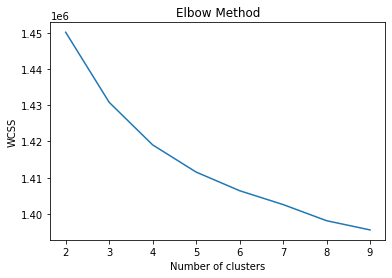

In [28]:
plt.plot(range(2, 10,1), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [29]:

kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(train_df)

In [30]:
#comparing output
y_df=pd.DataFrame({'y_actual':list(samples['label']),'y_pred':pred_y})
y_df.head()

,y_actual,y_pred
0,nihilism_Beyond Good and Evil,2
1,nihilism_Beyond Good and Evil,2
2,nihilism_Beyond Good and Evil,2
3,nihilism_Beyond Good and Evil,2
4,nihilism_Beyond Good and Evil,2


In [31]:
#trying 6 clusters for visualization
kmeans_6 = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y_6 = kmeans_6.fit_predict(train_df)
y_df_6=pd.DataFrame({'y_actual':list(samples['label']),'y_pred':pred_y_6})
pca = PCA(n_components=2)
reduced_features_6 = pca.fit_transform(train_df)
reduced_cluster_centers_6 = pca.transform(kmeans_6.cluster_centers_)

In [32]:
#reducing the dimention to 2D
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(train_df)
reduced_cluster_centers = pca.transform(kmeans.cluster_centers_)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

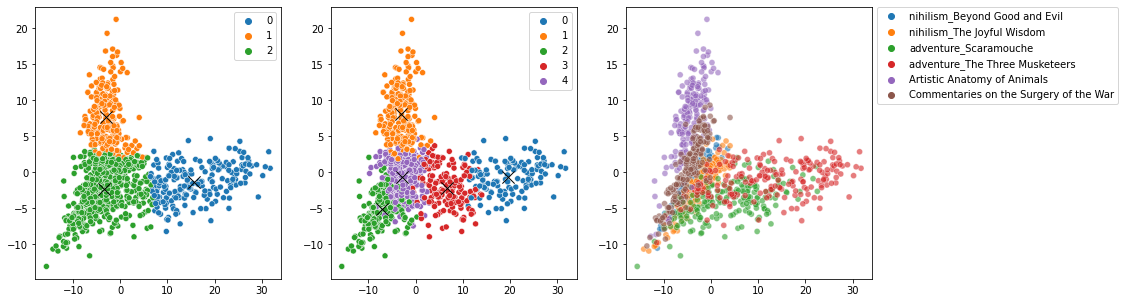

In [33]:
#
my_palette=sns.color_palette()
n_class=len(reduced_cluster_centers)
n2=len(reduced_cluster_centers_6)
fig, axes = plt.subplots(1, 3, figsize=(15,5))
sns.scatterplot(reduced_features[:,0], reduced_features[:,1], hue=  y_df['y_pred'],palette=my_palette[:n_class],ax=axes[0])
sns.scatterplot(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, color='black',ax=axes[0])

sns.scatterplot(reduced_features[:,0], reduced_features[:,1], hue= y_df_6['y_pred'],palette=my_palette[:n2],ax=axes[1])
sns.scatterplot(reduced_cluster_centers_6[:, 0], reduced_cluster_centers_6[:,1], marker='x', s=150, color='black',ax=axes[1])

sns.scatterplot(reduced_features[:,0], reduced_features[:,1], hue = y_df['y_actual'],palette=my_palette[:books_count],ax=axes[2],alpha=0.6);
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

In [34]:
y_df[y_df['y_pred']==0]['y_actual'].value_counts()

adventure_The Three Musketeers    134
adventure_Scaramouche              73
Name: y_actual, dtype: int64

In [35]:
y_df[y_df['y_pred']==1]['y_actual'].value_counts()

Artistic Anatomy of Animals               167
Commentaries on the Surgery of the War     67
nihilism_Beyond Good and Evil              11
nihilism_The Joyful Wisdom                  8
adventure_The Three Musketeers              2
adventure_Scaramouche                       1
Name: y_actual, dtype: int64

In [36]:
y_df[y_df['y_pred']==2]['y_actual'].value_counts()

nihilism_The Joyful Wisdom                192
nihilism_Beyond Good and Evil             189
Commentaries on the Surgery of the War    133
adventure_Scaramouche                     126
adventure_The Three Musketeers             64
Artistic Anatomy of Animals                33
Name: y_actual, dtype: int64

In [37]:
## calculating silhouette score
silhouette_avg = silhouette_score(train_df, pred_y)
print("For n_clusters =", n_class,
      " \nThe average silhouette_score is :", silhouette_avg)

silhouette_avg = silhouette_score(train_df, pred_y_6)
print("For n_clusters =", 5,
      " \nThe average silhouette_score is :", silhouette_avg)

# Compute the silhouette scores for each sample
# sample_silhouette_values = silhouette_samples(train_df, pred_y)
# sample_silhouette_values

For n_clusters = 3  
The average silhouette_score is : -0.004146416782228237
For n_clusters = 5  
The average silhouette_score is : -0.008180834253538721


this indicates that 3 clusters case is better than 5 because the -ve sign means that the classes are overlapping and some are wrongly predicted.

## LDA

In [74]:
from gensim.models import LdaMulticore
from gensim.corpora.dictionary import Dictionary
from gensim import corpora, models


# Create a corpus from a list of texts
dictionary = Dictionary(samples['tokinized_doc'])
#Filter out tokens that appear in less than 15 doc, or more than 50% in all docs and take top 10000 word
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=10000)
#doc to bow
bow_corpus = [dictionary.doc2bow(doc) for doc in samples['tokinized_doc']]
#apply tfidf # didn't change alot
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]


calculationg coherence score to pick the best number of topics

In [105]:
from gensim.models.coherencemodel import CoherenceModel
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    coherence_values_umass= []
    model_list = []
    for num_topics in range(start, limit, step):
        model=LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model,texts=texts, dictionary=dictionary, coherence='c_v')
        coherencemodel_umass= CoherenceModel(model=model, corpus=corpus, coherence='u_mass')
        coherence_values.append(coherencemodel.get_coherence())
        coherence_values_umass.append(coherencemodel_umass.get_coherence())
    return model_list, coherence_values, coherence_values_umass

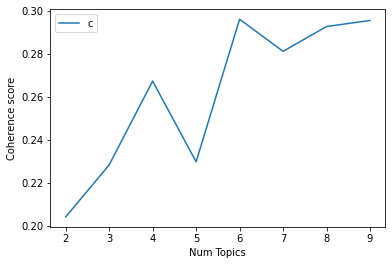

In [106]:
model_list, coherence_values,coherencemodel_umass = compute_coherence_values(dictionary=dictionary, corpus=bow_corpus, texts=samples['tokinized_doc'], start=2, limit=10, step=1)
# Show graph
import matplotlib.pyplot as plt
limit=10; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

number of topics 6 have highest coherence but may have repeated keywords in the topic so we'll pick 4 as it has high coherence and better clusters size.

In [108]:
# Train the model on the bow corpus.
n_topics=4
lda_model = LdaMulticore(bow_corpus, num_topics=n_topics, id2word=dictionary, passes=2, workers=2,random_state=0)

for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.016*"â" + 0.013*"muscle" + 0.012*"bone" + 0.009*"surface" + 0.009*"part" + 0.008*"fig" + 0.007*"two" + 0.007*"external" + 0.007*"anterior" + 0.005*"horse"
Topic: 1 
Words: 0.131*"â" + 0.013*"said" + 0.011*"dâ" + 0.009*"artagnan" + 0.009*"de" + 0.006*"man" + 0.006*"andre" + 0.006*"would" + 0.006*"louis" + 0.006*"monsieur"
Topic: 2 
Words: 0.037*"â" + 0.006*"man" + 0.006*"even" + 0.006*"would" + 0.005*"may" + 0.005*"said" + 0.004*"u" + 0.004*"de" + 0.004*"must" + 0.004*"much"
Topic: 3 
Words: 0.008*"man" + 0.006*"â" + 0.006*"even" + 0.006*"may" + 0.006*"time" + 0.006*"also" + 0.006*"u" + 0.005*"part" + 0.005*"good" + 0.005*"would"


In [109]:
#testing record 1000 
for index, score in sorted(lda_model[bow_corpus[1000]], key=lambda tup: -1*tup[1]):
  print("topic {} \nScore: {}\t \nTopic: {} \n".format(index, score, lda_model.print_topic(index, 20)))

topic 0 
Score: 0.4511265456676483	 
Topic: 0.016*"â" + 0.013*"muscle" + 0.012*"bone" + 0.009*"surface" + 0.009*"part" + 0.008*"fig" + 0.007*"two" + 0.007*"external" + 0.007*"anterior" + 0.005*"horse" + 0.005*"side" + 0.005*"inferior" + 0.005*"posterior" + 0.005*"superior" + 0.005*"internal" + 0.005*"form" + 0.005*"portion" + 0.005*"great" + 0.005*"process" + 0.005*"man" 

topic 3 
Score: 0.44506171345710754	 
Topic: 0.008*"man" + 0.006*"â" + 0.006*"even" + 0.006*"may" + 0.006*"time" + 0.006*"also" + 0.006*"u" + 0.005*"part" + 0.005*"good" + 0.005*"would" + 0.005*"always" + 0.005*"_â" + 0.005*"wound" + 0.004*"life" + 0.004*"case" + 0.004*"perhaps" + 0.004*"men" + 0.004*"must" + 0.004*"thing" + 0.004*"much" 

topic 2 
Score: 0.10163920372724533	 
Topic: 0.037*"â" + 0.006*"man" + 0.006*"even" + 0.006*"would" + 0.005*"may" + 0.005*"said" + 0.004*"u" + 0.004*"de" + 0.004*"must" + 0.004*"much" + 0.004*"_" + 0.004*"wound" + 0.004*"first" + 0.004*"time" + 0.003*"perhaps" + 0.003*"muscle" + 0.

In [110]:
topic=[]
acc=[]
for doc in bow_corpus:
  t=sorted(lda_model[doc], key=lambda tup: -1*tup[1])[0]
  topic.append(t[0])
  acc.append(t[1])

In [111]:
Lda_df=pd.DataFrame({'y_actual':list(samples['label']),'topic':topic,'accuracy':acc})
Lda_df.head()

,y_actual,topic,accuracy
0,nihilism_Beyond Good and Evil,3,0.992232
1,nihilism_Beyond Good and Evil,3,0.993118
2,nihilism_Beyond Good and Evil,3,0.992550
3,nihilism_Beyond Good and Evil,3,0.991808
4,nihilism_Beyond Good and Evil,3,0.991700


In [112]:
# Lda_df.describe()

In [113]:
for i in range(n_topics):
  print(f"topic {i} : \n{Lda_df[Lda_df['topic']==i]['y_actual'].value_counts()}\n")

topic 0 : 
Artistic Anatomy of Animals               193
Commentaries on the Surgery of the War     45
Name: y_actual, dtype: int64

topic 1 : 
adventure_The Three Musketeers    198
adventure_Scaramouche             193
Name: y_actual, dtype: int64

topic 2 : 
nihilism_The Joyful Wisdom                12
Commentaries on the Surgery of the War     6
adventure_Scaramouche                      3
adventure_The Three Musketeers             2
Artistic Anatomy of Animals                2
nihilism_Beyond Good and Evil              1
Name: y_actual, dtype: int64

topic 3 : 
nihilism_Beyond Good and Evil             199
nihilism_The Joyful Wisdom                188
Commentaries on the Surgery of the War    149
Artistic Anatomy of Animals                 5
adventure_Scaramouche                       4
Name: y_actual, dtype: int64



In [114]:
pca = PCA(n_components=2,random_state=0)
reduced_features = pca.fit_transform(train_df)

/usr/local/lib/python3.7/dist-packages/scipy/linalg/decomp_qr.py:20: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  kwargs['lwork'] = ret[-2][0].real.astype(numpy.int)
/usr/local/lib/python3.7/dist-packages/scipy/linalg/decomp_qr.py:20: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, ch

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


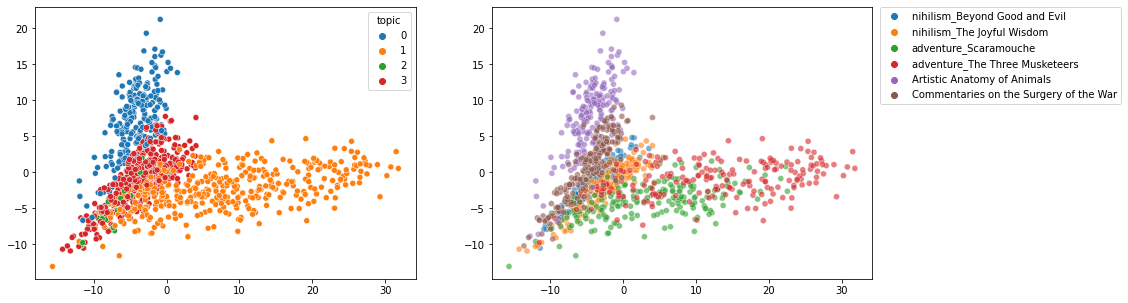

In [115]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

sns.scatterplot(reduced_features[:,0], reduced_features[:,1], hue=  Lda_df['topic'],palette=my_palette[:n_topics],ax=axes[0])

sns.scatterplot(reduced_features[:,0], reduced_features[:,1], hue = y_df['y_actual'],palette=my_palette[:books_count],ax=axes[1],alpha=0.6);
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

In [51]:
# !pip install  pyLDAvis

In [54]:
#visualizing the LDA topics
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

pyLDAvis.enable_notebook(local=True)
pyLDAvis.gensim_models.prepare(lda_model, bow_corpus, dictionary)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.031783 -0.068603       1        1  40.500495
1     -0.093147  0.017131       2        1  34.397984
0      0.068002  0.055168       3        1  22.389250
2     -0.006638 -0.003695       4        1   2.712271, topic_info=        Term         Freq        Total Category  logprob  loglift
1550       â  6594.000000  6594.000000  Default  30.0000  30.0000
633     said   692.000000   692.000000  Default  29.0000  29.0000
1618  muscle   478.000000   478.000000  Default  28.0000  28.0000
1674      dâ   560.000000   560.000000  Default  27.0000  27.0000
500       de   455.000000   455.000000  Default  26.0000  26.0000
...      ...          ...          ...      ...      ...      ...
1674      dâ    11.930838   560.678192   Topic4  -5.6610  -0.2426
217     time    12.003175   589.793912   Topic4  -5.6550  -0.2872
360    could    10.696461   378.892656   Topic4  -5.7702   0.0400
321      two    11.415285   525.011574   Topic4  -5.7052  -0.2211
31     great    10.613600   497.868409   Topic4  -5.7780  -0.2408

[322 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
1572      1  0.591165      _
1572      2  0.114949      _
1572      3  0.188844      _
1572      4  0.098528      _
1549      1  0.769413     _â
...     ...       ...    ...
599       4  0.032111  young
1550      1  0.049135      â
1550      2  0.862747      â
1550      3  0.069002      â
1550      4  0.019108      â

[954 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 2, 1, 3])

In [179]:
sorted(lda_model[bow_corpus[0]], key=lambda tup: -1*tup[1])

[(0, 0.98891914)]

(0, 0.98196155)
['tab:blue', 'tab:orange', 'tab:green', 'tab:red']


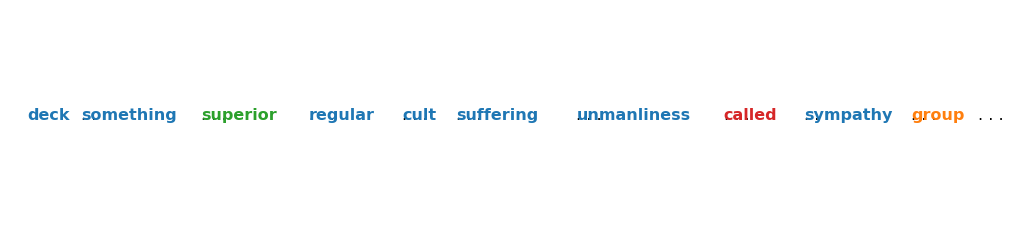

In [180]:
fig, ax = plt.subplots(1, 1)
print(sorted(lda_model[bow_corpus[0]], key=lambda tup: -1*tup[1])[0])
mycolors = [color for name, color in mcolors.TABLEAU_COLORS.items()]
print([name for name, color in mcolors.TABLEAU_COLORS.items()][:4])
word_pos = 0.06
for word in samples['tokinized_doc'][0][:10]:
  word_topic=sorted(lda_model[dictionary.doc2bow([word])], key=lambda tup: -1*tup[1])[0][0]
  ax.text(word_pos, 0.5, word,
          horizontalalignment='left',
          verticalalignment='center',
          fontsize=16, color=mycolors[word_topic],
          transform=ax.transAxes, fontweight=700)
  word_pos += .04 * len(word)  # to move the word for the next iter
  ax.axis('off')
  ax.text(word_pos, 0.5, '. . .',
  horizontalalignment='left',
  verticalalignment='center',
  fontsize=16, color='black',
  transform=ax.transAxes)  


[(0, 1), (1, 1), (2, 1), (3, 2), (4, 1), (5, 1), (6, 3), (7, 2), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 2), (19, 1), (20, 2), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 3), (30, 1), (31, 1), (32, 1), (33, 2), (34, 1), (35, 1), (36, 2), (37, 1), (38, 1), (39, 3), (40, 1), (41, 1), (42, 1), (43, 1), (44, 2), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 2), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 2), (75, 2), (76, 1), (77, 1), (78, 1), (79, 2), (80, 1), (81, 1), (82, 1), (83, 1)]


TypeError: ignored

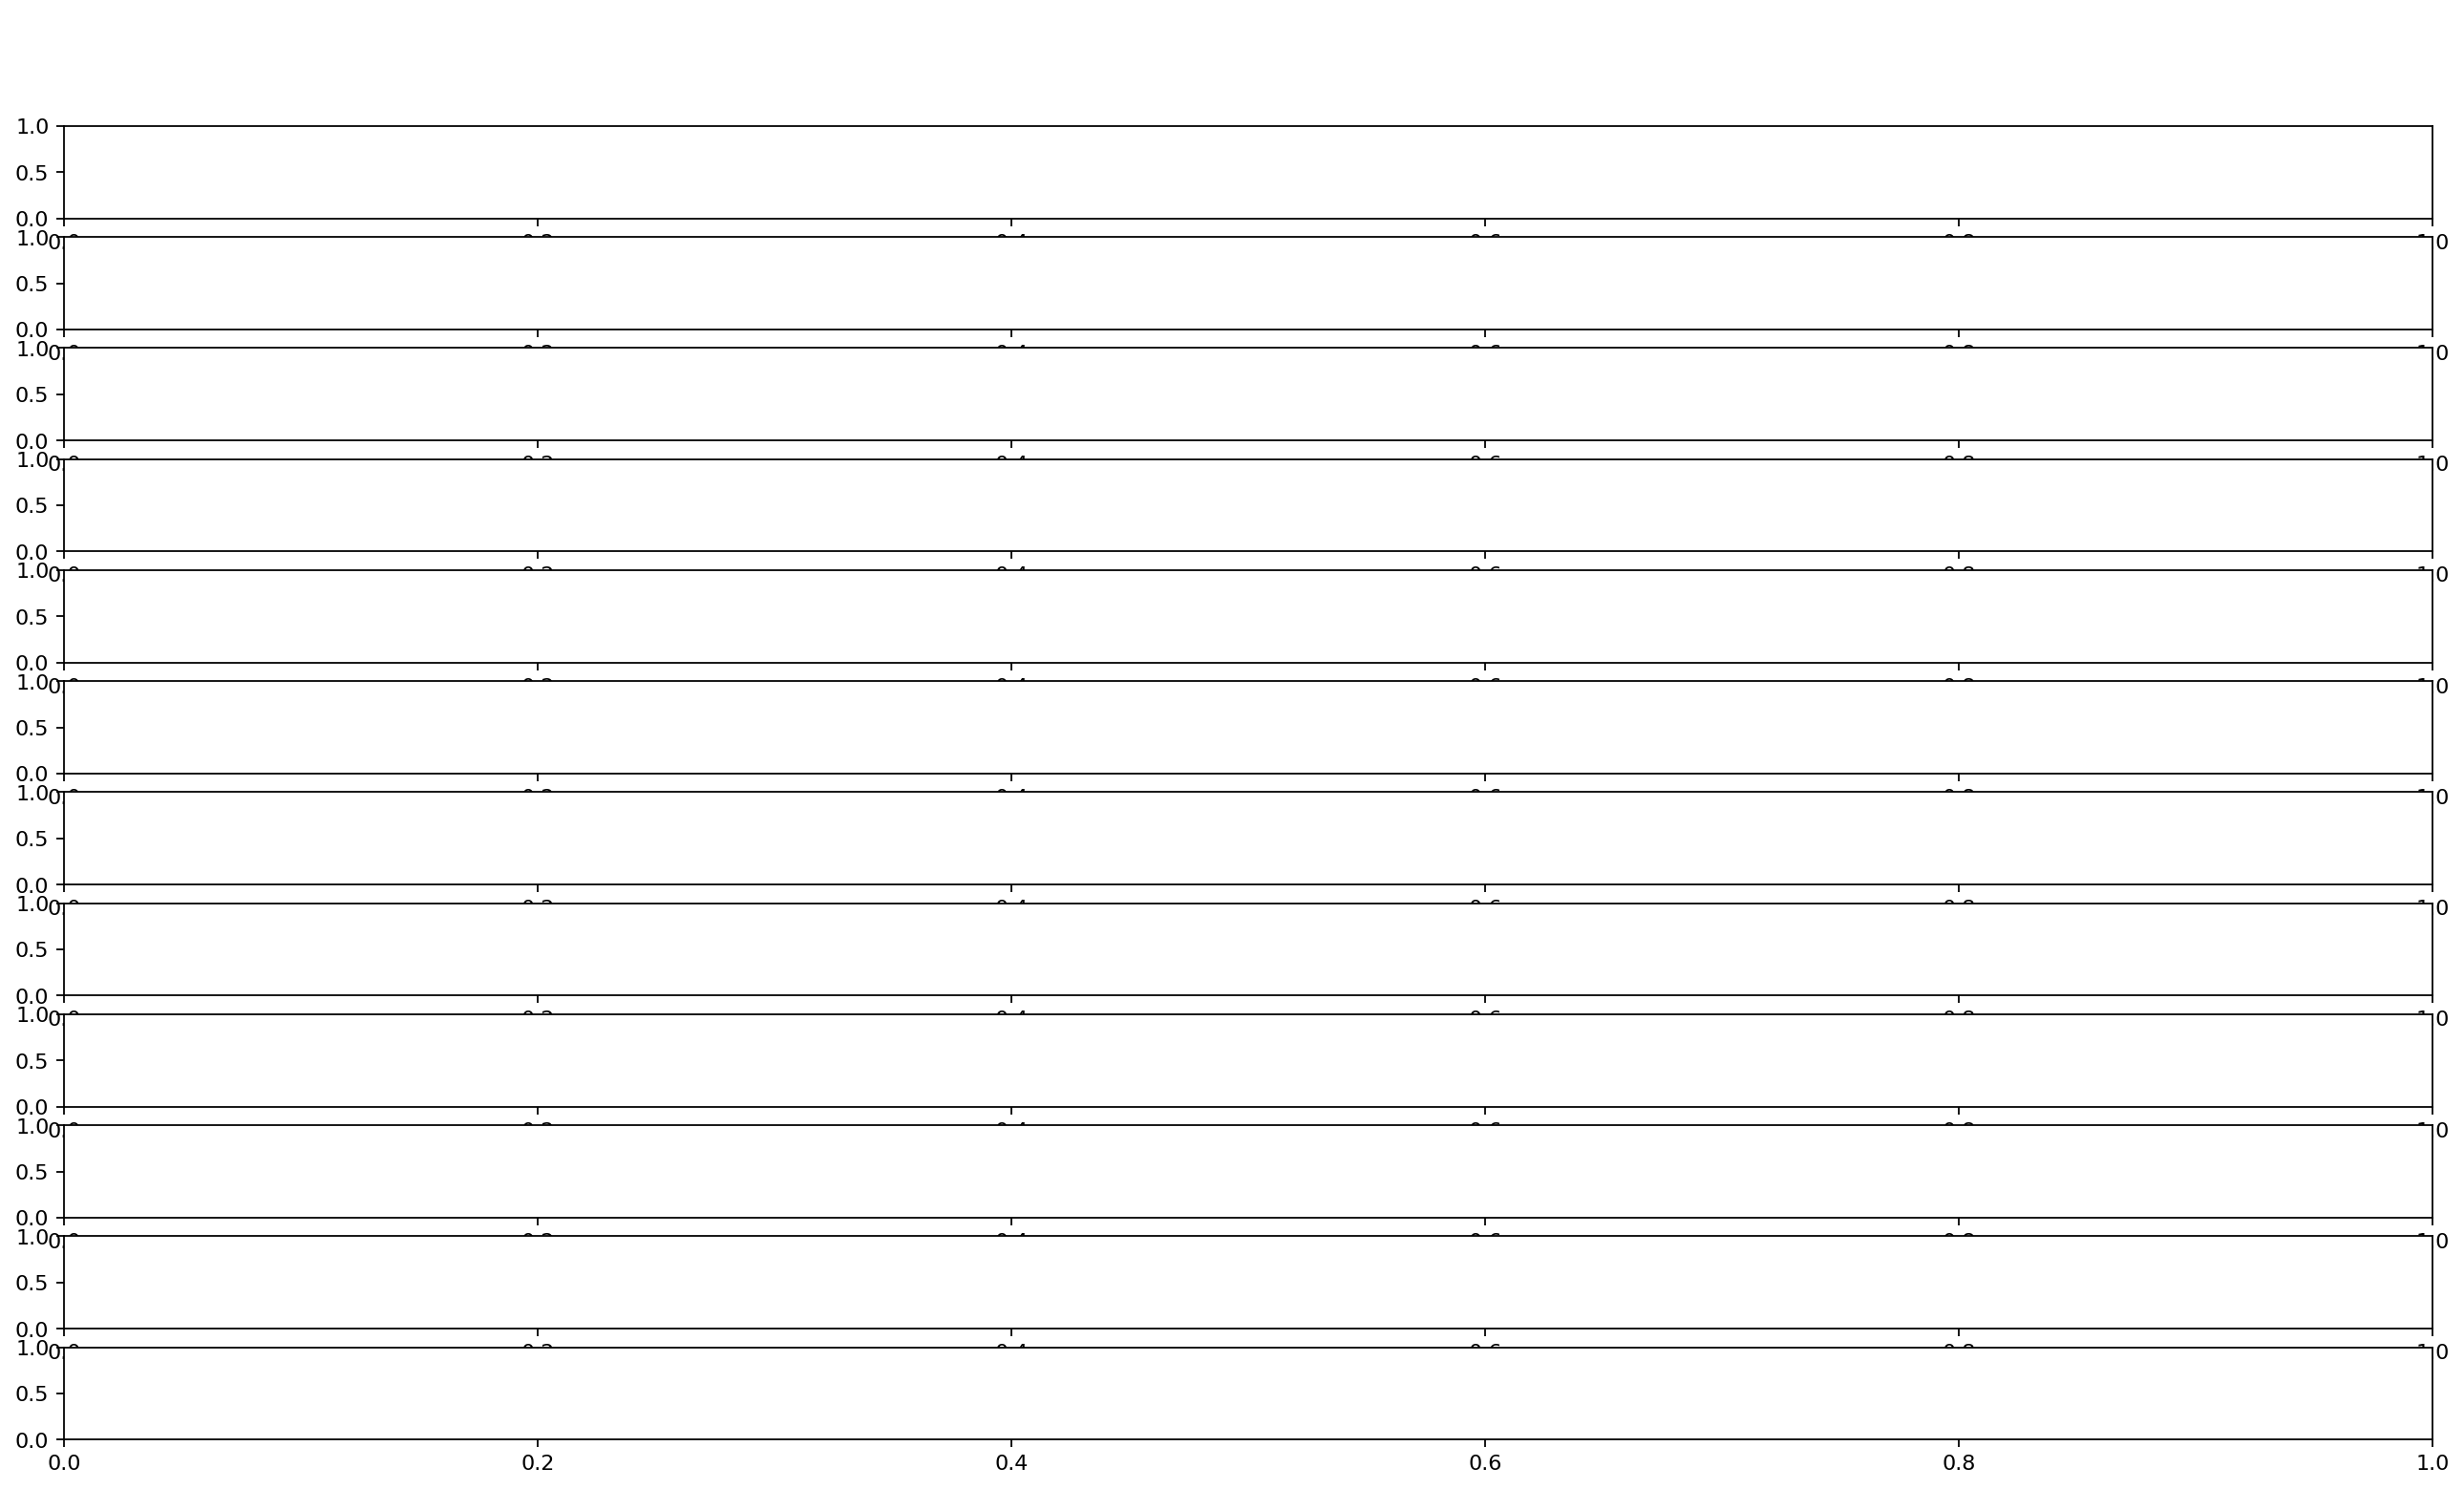

In [143]:
# Sentence Coloring of N Sentences
from matplotlib.patches import Rectangle
import matplotlib.colors as mcolors

def sentences_chart(lda_model=lda_model, corpus=bow_corpus, start = 0, end = 13):
    corp = corpus[start:end]
    mycolors = [color for name, color in mcolors.TABLEAU_COLORS.items()]

    fig, axes = plt.subplots(end-start, 1, figsize=(20, (end-start)*0.95), dpi=160)       
    axes[0].axis('off')
    for i, ax in enumerate(axes):
        if i > 0:
            corp_cur = corp[i-1] 
            print(corp_cur)
            topic_percs, wordid_topics, wordid_phivalues = lda_model[corp_cur]
            word_dominanttopic = [(lda_model.id2word[wd], topic[0]) for wd, topic in wordid_topics]    
            ax.text(0.01, 0.5, "Doc " + str(i-1) + ": ", verticalalignment='center',
                    fontsize=16, color='black', transform=ax.transAxes, fontweight=700)

            # Draw Rectange
            topic_percs_sorted = sorted(topic_percs, key=lambda x: (x[1]), reverse=True)
            ax.add_patch(Rectangle((0.0, 0.05), 0.99, 0.90, fill=None, alpha=1, 
                                   color=mycolors[topic_percs_sorted[0][0]], linewidth=2))

            word_pos = 0.06
            for j, (word, topics) in enumerate(word_dominanttopic):
                if j < 14:
                    ax.text(word_pos, 0.5, word,
                            horizontalalignment='left',
                            verticalalignment='center',
                            fontsize=16, color=mycolors[topics],
                            transform=ax.transAxes, fontweight=700)
                    word_pos += .009 * len(word)  # to move the word for the next iter
                    ax.axis('off')
            ax.text(word_pos, 0.5, '. . .',
                    horizontalalignment='left',
                    verticalalignment='center',
                    fontsize=16, color='black',
                    transform=ax.transAxes)       

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.suptitle('Sentence Topic Coloring for Documents: ' + str(start) + ' to ' + str(end-2), fontsize=22, y=0.95, fontweight=700)
    plt.tight_layout()
    plt.show()

sentences_chart()   

In [ ]:
## calculating silhouette score
silhouette_avg = silhouette_score(train_df, Lda_df['topic'])
print("The average silhouette_score for LDA model is :", silhouette_avg)

In [ ]:
##homogeneity_score
from sklearn.metrics.cluster import homogeneity_score
homogeneity_score([0, 0, 1, 1], [0, 1, 1, 1])